In [1]:
import pandas as pd

In [37]:
from IPython.core.magic import Magics, line_magic, magics_class
from simple_salesforce import Salesforce
import pandas as pd

@magics_class
class SfMagics(Magics):
    
    def login_into_sf(self,username,password,token,url):
		sf = Salesforce(username=username,password=password,security_token=token,instance=url,sandbox=True)
		# data = sf.query("select id,lastname from contact limit 1000")
		ns = self.shell.user_ns
		ns['sfObject'] = sf

    @line_magic
    def sflogin(self, line='', setup='pass'):
    	opts, stmt = self.parse_options(line, 'u:p:t:l', posix=False,strict=False)
    	try:
    		self.login_into_sf(opts["u"], opts["p"], opts["t"],opts["l"])
    	except Exception as e:
    		pass


    @line_magic
    def sf_query(self,query):
    	data = self.shell.user_ns['sfObject'].query(query)
    	df =  pd.DataFrame.from_dict(data['records'])
    	df = df.drop('attributes',axis=1)
    	return df

if __name__ == '__main__':
    ip = get_ipython()
    ip.register_magics(SfMagics)
    try:
    	from sys import modules
    	pandas_module = modules['pandas']
    except KeyError, e:
    	print("Please load pandas into environment")


    # globals()['pd'].read_sf = SfMagics().read_salesforce

In [54]:
%sflogin -u mulesoftintegration@akamai.com.l2cqa2 -p Dec@2020 -t zG3Nv0zu3uWcfc8D8SOKQjA3b -l https://akamai--l2cqa2.cs21.my.salesforce.com/

In [39]:
from simple_salesforce import Salesforce

def sf_query(query,index_col=''):
    data = sfObject.query(query)
    df =  pd.DataFrame.from_dict(data['records'])
    df = df.drop('attributes',axis=1)
    if index_col != '' and index_col in df.keys():
        df = df.set_index(index_col)
    else:
        print("Index column doesn't exist")
    return df

if __name__ == "__main__":
	pd.read_salesforce = sf_query

In [49]:
data = pd.read_salesforce("select Approver__c, BMCServiceDesk__Actual_Outage_Time_Hours__c, BMCServiceDesk__actualDuration__c, BMCServiceDesk__actualOutageDuration__c, BMCServiceDesk__AllTaskCloseController__c, BMCServiceDesk__Approved__c, BMCServiceDesk__call__c, BMCServiceDesk__Category_ID__c, BMCServiceDesk__Client_Account__c, BMCServiceDesk__Client_Manager__c, BMCServiceDesk__Client_Name__c, BMCServiceDesk__Client_Type__c, BMCServiceDesk__clientEmail__c, BMCServiceDesk__clientFirstName__c, BMCServiceDesk__clientId__c, BMCServiceDesk__clientLastName__c, BMCServiceDesk__Closed_By__c, BMCServiceDesk__closeDateTime__c, BMCServiceDesk__closeTasks__c, BMCServiceDesk__completedDate__c, BMCServiceDesk__Compliant__c, BMCServiceDesk__contactType__c, BMCServiceDesk__dueDateTime__c, BMCServiceDesk__Event_ID__c, BMCServiceDesk__Feedback__c, BMCServiceDesk__firstCallResolution__c, BMCServiceDesk__FKAccount__c, BMCServiceDesk__FKBMC_BaseElement__c, BMCServiceDesk__FKBroadcast__c, BMCServiceDesk__FKBusinessService__c, BMCServiceDesk__FKCategory__c, BMCServiceDesk__FKClient__c, BMCServiceDesk__FKClosedBy__c, BMCServiceDesk__FKContact__c, BMCServiceDesk__FKImpact__c, BMCServiceDesk__FKIncident__c, BMCServiceDesk__FKLead__c, BMCServiceDesk__FKOpenBy__c, BMCServiceDesk__FKPriority__c, BMCServiceDesk__FKRequestDefinition__c, BMCServiceDesk__FKRequestDetail__c, BMCServiceDesk__FKServiceOffering__c, BMCServiceDesk__FKStatus__c, BMCServiceDesk__FKTemplate__c, BMCServiceDesk__FKUrgency__c, BMCServiceDesk__followUp__c, BMCServiceDesk__followUpDateTime__c, BMCServiceDesk__Impact_Id__c, BMCServiceDesk__inactive__c, BMCServiceDesk__incidentDescription__c, BMCServiceDesk__incidentResolution__c, BMCServiceDesk__Incorrect_category__c, BMCServiceDesk__Incorrect_owner__c, BMCServiceDesk__isServiceRequest__c, BMCServiceDesk__LockedRecordTimestamp__c, BMCServiceDesk__maximumDuration__c, BMCServiceDesk__note__c, BMCServiceDesk__openDateTime__c, BMCServiceDesk__outageFrom__c, BMCServiceDesk__outageTo__c, BMCServiceDesk__Priority_ID__c, BMCServiceDesk__Queue__c, BMCServiceDesk__queueName__c, BMCServiceDesk__Reassigned_Count__c, BMCServiceDesk__recommendedFixDateTime__c, BMCServiceDesk__respondedDateTime__c, BMCServiceDesk__responseDateTime__c, BMCServiceDesk__Service_Request_Title__c, BMCServiceDesk__ServiceRequest__c, BMCServiceDesk__ShowDueDateDialog__c, BMCServiceDesk__state__c, BMCServiceDesk__Status_ID__c, BMCServiceDesk__TemplateAlreadyApplied__c, BMCServiceDesk__TemplateName__c, BMCServiceDesk__timeSpent__c, BMCServiceDesk__Total_Duration__c, BMCServiceDesk__Type__c, BMCServiceDesk__Urgency_ID__c, BMCServiceDesk__WorkflowController__c, Category_Service_Owner__c, Cc__c, CCText__c, Client_ID_Email__c, ConnectionReceivedId, ConnectionSentId, CreatedById, CreatedDate, CurrencyIsoCode, Customer_Advisory__c, Customer_impact_Extent_of_impact__c, Days_Open__c, Detection_Time__c, dl_SysAdmin__c, EB_SI__c, Effort_Estimation__c, Exclude_Client_Notifications__c, HD_Additional_Hardware_Approved__c, HD_Additional_Hardware_Rejected__c, HD_Approval_Status__c, HD_Client_City__c, HD_Client_dept__c, HD_Client_title__c, HD_EmailCC1__c, HD_EmailCC10__c, HD_EmailCC2__c, HD_EmailCC3__c, HD_EmailCC4__c, HD_EmailCC5__c, HD_EmailCC6__c, HD_EmailCC7__c, HD_EmailCC8__c, HD_EmailCC9__c, HD_EmailCCFormula1__c, HD_EmailCCFormula2__c, HD_EmailCCFormula3__c, HD_Flag_For_Review__c, HD_High_Customer_Impact__c, HD_HR_Region__c, HD_IncidentGroup__c, HD_Owner_Manager__c, HD_Owner_user_queue__c, HD_Parent_Category__c, HD_Parent_Tree__c, HD_Queue_name__c, HD_RAA_Approval_Flag__c, HD_SLA_Agreement_Match__c, HD_System_Admin_Incident__c, HD_Test_Value__c, HD_Ticket_Priority__c, HD_VP_Approver__c, HD_WhiteHat_Incident__c, Hours__c, How_was_the_Issue_Detected__c, HR_Sub_category__c, Id, Impacted_Location__c, Incident_Count__c, Incident_Crossed_SLA__c, Incident_No__c, IsDeleted, Last_Owner__c, Last_Updated_Date_Time__c, LastActivityDate, LastModifiedById, LastModifiedDate, LastReferencedDate, LastViewedDate, Name, Opened_Date_For__c, OwnerId, RA_Config_Value__c, Record_Type__c, RecordTypeId, Request_Type__c, Root_Cause_Added__c, Same_Region_Ticket__c, SamTestcc11__c, SI_AkamContact_All_Count__c, SI_AkamContact_BusinessExec_Count__c, SI_AkamContact_CCareGSSPresenterReport__c, SI_AkamContact_GSSIncidentMgr_Count__c, SI_AkamContact_NOCC_Count__c, SI_AkamContact_PlatformExec_Count__c, SI_AkamContact_PlatformPresenterReport__c, SI_AkamContact_Tech_IncidentMgr_Count__c, SI_Created_Date_International_format__c, SI_Customer_Dos__c, SI_Diagnosis__c, SI_End_User_Symptom__c, SI_Field_Update_Done_Send_Email_Now__c, SI_GSS_Inc_Manager_BIL__c, SI_GSS_Incident_Manager__c, SI_Impacted_CP_Codes_Domains__c, SI_Impacted_Customers_Count__c, SI_Impacted_Products_Count__c, SI_Incident_Caused_By__c, SI_Incident_Link__c, SI_Incident_Report_Completion_Date__c, SI_Incident_Report_Request_Date__c, SI_Incident_Review_Present_Date__c, SI_Incident_Review_Status__c, SI_Incident_Sensitivity__c, SI_Incident_Start_Time_InternationalForm__c, SI_Network__c, SI_OutageEnd__c, SI_OutageStart__c, SI_Platform_Review_Date__c, SI_SD_Dashboard_Incident__c, SI_StatusChangeDate__c, SI_Technical_Notes__c, Source__c, SR_Priority__c, SystemModstamp, Total_LOE_on_Service_Incident__c, VIP_Ticket__c, Workaround__c from BMCServiceDesk__Incident__c where BMCServiceDesk__openDateTime__c > 2014-12-31T11:59:59.999Z limit 1000")

Index column doesn't exist


In [52]:
data.BMCServiceDesk__Total_Duration__c

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
170    0
171    0
172    0
173    0
174    0
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    0
Name: BMCServiceDesk__Total_Duration__c, dtype: float64

In [21]:
print 1+2

3


In [22]:
import pandas as pd

In [23]:
data = pd.read_csv("/Users/ckasturi/Desktop/2015_Dec_Invoices.csv")


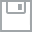
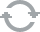
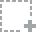
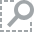
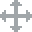
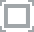
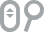
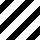
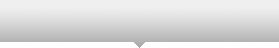
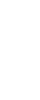
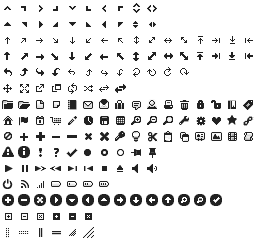
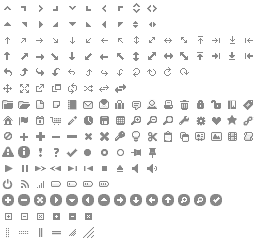
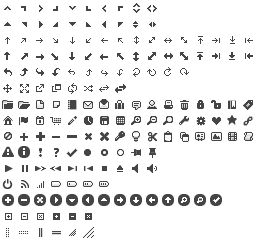
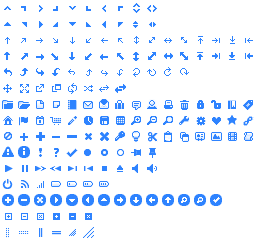
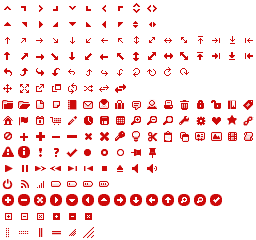
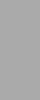
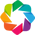
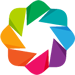

In [29]:
from bokeh.charts import BoxPlot,output_notebook,show
output_notebook()
p = BoxPlot(data.RES,values='RES')
show(p)

In [28]:
del output_file

NameError: name 'output_file' is not defined

In [2]:
"""
  Need to run `ping google.com >> /tmp/google.txt` in another terminal.
"""
import re
from bokeh.plotting import *
from bokeh.objects import GlyphRenderer

MAX_HISTORY = 1000
output_server("ping")

def tail_generator(filename="/tmp/google.txt", interval=0.5):
    """
    Reads file and then `tails` it -- checking at interval seconds
    Adapted from: http://code.activestate.com/recipes/157035-tail-f-in-python/
    """
    with open(filename, 'r') as f:
        while True:
            where = f.tell()
            line = f.readline()
            if not line:
                time.sleep(interval)
                f.seek(where)
            else:
                yield line

def parse_line(line):
    """Find sequence and rtt -- return as int, float or return None"""
    regex = re.compile(r'icmp_seq=(?P<seq>[0-9]+) .* time=(?P<time>[0-9.]+) ms')
    m = regex.search(line)
    if not m:
       return None
    return int(m.groupdict()["seq"]), float(m.groupdict()["time"])

x = [-1]
y = [0]
line(x,y)
#show()

renderer = [r for r in curplot().renderers if isinstance(r, GlyphRenderer)][0]
ds = renderer.data_source

f = tail_generator()
for line_ in f:
    
    data = parse_line(line_)
    if data is None:
        continue
    x.append(data[0])
    y.append(data[1])
    
    if len(x) > MAX_HISTORY:
        x = x[-MAX_HISTORY:]
    if len(y) > MAX_HISTORY:
        y = y[-MAX_HISTORY:]
    ds.data["x"] = x
    ds.data["y"] = y
   
    ds._dirty = True
    session().store_obj(ds)
    time.sleep(.01)

ImportError: No module named objects

DEBUG:root:--- request header ---
DEBUG:root:GET /2/rsvps HTTP/1.1
Upgrade: websocket
Connection: Upgrade
Host: stream.meetup.com
Origin: http://stream.meetup.com
Sec-WebSocket-Key: bTtVpfFpFQ26quh7egBaSA==
Sec-WebSocket-Version: 13


DEBUG:root:-----------------------
DEBUG:root:--- response header ---
DEBUG:root:HTTP/1.1 101 Switching Protocols
DEBUG:root:Date: Mon, 18 Jan 2016 14:10:38 GMT
DEBUG:root:Connection: upgrade
DEBUG:root:Set-Cookie: __cfduid=d8263ff642bfa3868032626513a13d0191453126237; expires=Tue, 17-Jan-17 14:10:37 GMT; path=/; domain=.meetup.com; HttpOnly
DEBUG:root:Upgrade: websocket
DEBUG:root:Sec-WebSocket-Accept: MPlYvzH/f3AdTDczGkav9W9fYKU=
DEBUG:root:Server: cloudflare-nginx
DEBUG:root:CF-RAY: 266ae268fa412fed-MAA
DEBUG:root:-----------------------


Forte Interactive
The Cock Tavern (Function Room)
Manoa Shopping Center
Multivarious Games
Kaptár
 112 Palace Gardens Terrace,

DEBUG:root:send: '\x88\x82\xa1\xaa`)\xa2B'



### closed ###


KeyboardInterrupt: 

In [25]:
from bokeh.io import output_file, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)
import websocket
import thread
import time
import json

def on_message(ws, message):
#     print message
    json_data = json.loads(message)
    if(json_data['venue']['venue_name'] != None):
        print json_data['venue']['venue_name']
        source = ColumnDataSource(
            data=dict(
                lat=[json_data['lat']],
                lon=[json_data['lon']],
            )
        )
#         plot.add_glyph(source,)
#     print 

def on_error(ws, error):
    print error

def on_close(ws):
    print "### closed ###"

if __name__ == "__main__":
    websocket.enableTrace(False)
    ws = websocket.WebSocketApp("ws://stream.meetup.com/2/rsvps",
                              on_message = on_message,
                              on_error = on_error,
                              on_close = on_close)
    map_options = GMapOptions(lat=24.878028, lng=4.0184485, map_type="roadmap", zoom=1)
    circle = Circle(x="lon", y="lat", size=15, fill_color="blue", fill_alpha=0.8, line_color=None)
    plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
    output_file("gmap_plot.html")
    ws.run_forever()




York County Economic Alliance
Juicy Ladies Organic Cafe
The Oliver Bird Hall
Tech Space
Club Moving Cluj
Mc Donald Sarinah
bitExpert AG

ERROR:root:error from callback <function on_message at 0x10911a6e0>: 'venue'



Nouveau Antique Art Bar
Aikido Center of Manasquan
### closed ###


  File "/Library/Python/2.7/site-packages/websocket/_app.py", line 247, in _callback
    callback(self, *args)
  File "<ipython-input-25-449f9ebc7c95>", line 15, in on_message
    if(json_data['venue']['venue_name'] != None):


KeyboardInterrupt: 